In [1]:
!pip install opencv-python pycocotools matplotlib onnxruntime onnx 


^C


In [ ]:
!pip install torchvision


In [1]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys

PyTorch version: 2.3.1
Torchvision version: 0.18.1
CUDA is available: True


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

img_path='D:\\ai-study\\segment-anything\\test.png'

In [10]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt 
%matplotlib inline

img = Image.fromarray(image)
print(img.mode)
img

In [29]:
import numpy as np
from segment_anything import SamPredictor, sam_model_registry

input_point = np.array([[542,164]])
input_label = np.array([1])
device ="cuda"
chk_path="D:\ComfyUIv1_3\models\sams\sam_vit_h_4b8939.pth"
sam = sam_model_registry["default"](checkpoint=chk_path)
sam.to(device=device)
predictor = SamPredictor(sam)
predictor.set_image(image)
masks, scores, logits = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=True)


<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\EricXZPan\AppData\Local\Temp\ipykernel_9868\166353160.py:7: SyntaxWarning: invalid escape sequence '\C'
  chk_path="D:\ComfyUIv1_3\models\sams\sam_vit_h_4b8939.pth"


In [23]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))    

(3, 1024, 1024)


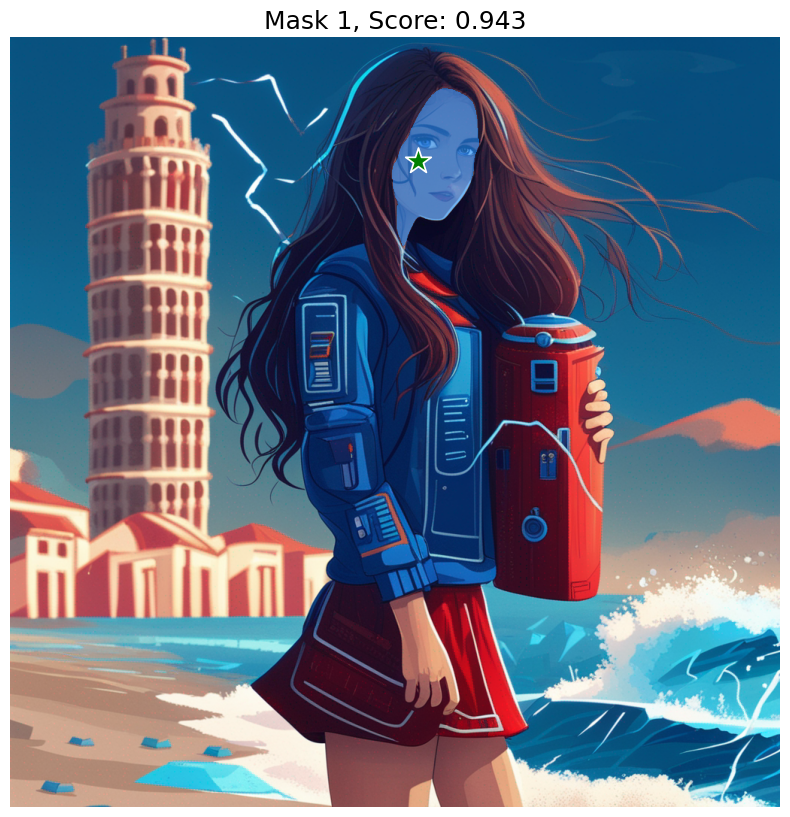

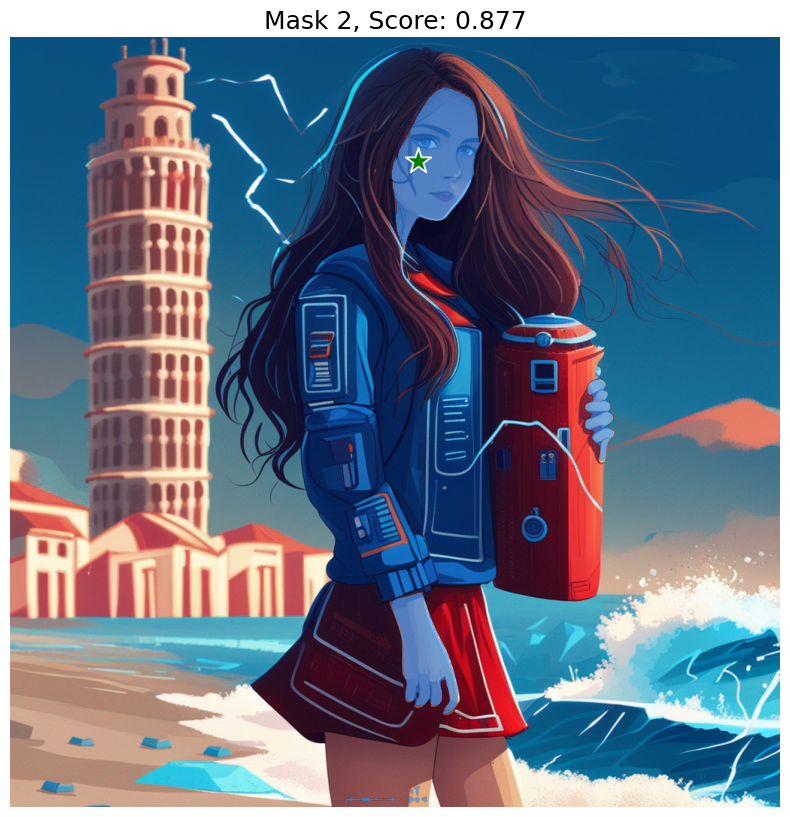

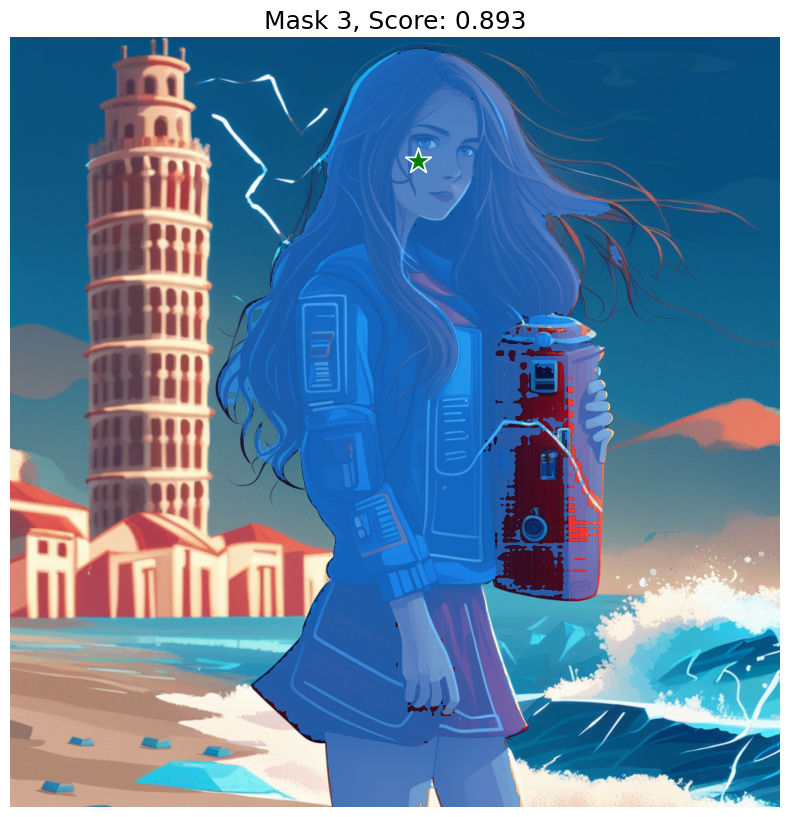

In [30]:
print(masks.shape)

for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f'Mask {i+1}, Score: {score:.3f}', fontsize=18)
    plt.axis('off')
    plt.show()

In [ ]:
!conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia


In [17]:
!nvidia-smi

Sat Jul 13 14:57:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.33                 Driver Version: 546.33       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   43C    P8              12W / 165W |  16072MiB / 16380MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--